# Medicaid, drug spending

In [1]:
df = read.csv('medicaid-costs-master.csv')

library(dplyr)
library(ggplot2)
library(repr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [18]:
df$drug_spending = df$drug_spending %>% sub('\\$','',.) %>% gsub('\\,','',.) %>% as.numeric(.)
df$drug_rebates = df$drug_rebates %>% sub('\\$','',.) %>% gsub('\\,','',.) %>% as.numeric(.)
df$spending_less_rebates = df$spending_less_rebates %>% sub('\\$','',.) %>% gsub('\\,','',.) %>% as.numeric(.)
df$medicaid_state = df$medicaid_state %>% sub('\\$','',.) %>% gsub('\\,','',.) %>% as.numeric(.)
df$medicaid_federal = df$medicaid_federal %>% sub('\\$','',.) %>% gsub('\\,','',.) %>% as.numeric(.)
df$medicaid_total = df$medicaid_total %>% sub('\\$','',.) %>% gsub('\\,','',.) %>% as.numeric(.)
df$all_spending_state = df$all_spending_state %>% sub('\\$','',.) %>% gsub('\\,','',.) %>% as.numeric(.)
df$all_spending_federal = df$all_spending_federal %>% sub('\\$','',.) %>% gsub('\\,','',.) %>% as.numeric(.)
df$all_spending_total = df$all_spending_total %>% sub('\\$','',.) %>% gsub('\\,','',.) %>% as.numeric(.)
df$medicaid_as_share_of_all_spending = df$medicaid_as_share_of_all_spending %>% sub('\\%','',.) %>% as.character(.) %>% as.numeric(.)

In [19]:
head(df)

period_covered,st_abbreviation,st_name,drug_spending,drug_rebates,spending_less_rebates,medicaid_state,medicaid_federal,medicaid_total,all_spending_state,all_spending_federal,all_spending_total,medicaid_as_share_of_all_spending
2008,AK,Alaska,82927006,-21507868,61419138,359000000,612000000,971000000,9342000000,2314000000,11656000000,8.33
2008,AL,Alabama,441171250,-139935487,301235764,1501000000,2899000000,4400000000,13549000000,6291000000,19840000000,22.18
2008,AR,Arkansas,326156278,-105904688,220251590,937000000,2494000000,3431000000,12093000000,4806000000,16899000000,20.30
2008,CA,California,3104054352,-1223480059,1880574293,13434000000,24857000000,38291000000,138065000000,56211000000,194276000000,19.71
2008,CO,Colorado,231323507,-73561741,157761766,1905204000,1720625000,3625829000,20389260000,4738747000,25128007000,14.43
2008,CT,Connecticut,355565440,-93077341,262488099,4265000000,0,4265000000,22153870636,2116958556,24270829192,17.57


Get summaries for plots

In [20]:
amts = df %>%
    group_by(period_covered) %>%
    summarise(medicaid_perc = sum(medicaid_total)/sum(all_spending_total)*100)
amts$medicaid_perc
amts

[1] 20.49083 21.81203 22.22471 23.80227 23.90511 24.32234 26.52106 27.93481
[9] 28.70977

period_covered,medicaid_perc
2008,20.49083
2009,21.81203
2010,22.22471
2011,23.80227
2012,23.90511
2013,24.32234
2014,26.52106
2015,27.93481
2016,28.70977


In [21]:
totals = df %>%
    group_by(period_covered) %>%
    summarise(total = sum(spending_less_rebates)/1000000000)
totals$total
totals

[1] 15.18153 15.16975 19.99600 19.75624 18.12830 17.06612 24.19578 27.82638
[9] 26.38738

period_covered,total
2008,15.18153
2009,15.16975
2010,19.99600
2011,19.75624
2012,18.12830
2013,17.06612
2014,24.19578
2015,27.82638
2016,26.38738


### Drug spending as a percentage of Medicaid by state, over time

In [22]:
str2dol = function(arr) {
    arr = gsub('\\$','',arr) %>% gsub('\\,','',.) %>% as.character() %>% as.numeric()
    return(arr)
}

df$spending_less_rebates = str2dol(df$spending_less_rebates)
df$medicaid_total = str2dol(df$medicaid_total)

In [23]:
head(df)

period_covered,st_abbreviation,st_name,drug_spending,drug_rebates,spending_less_rebates,medicaid_state,medicaid_federal,medicaid_total,all_spending_state,all_spending_federal,all_spending_total,medicaid_as_share_of_all_spending
2008,AK,Alaska,82927006,-21507868,61419138,359000000,612000000,971000000,9342000000,2314000000,11656000000,8.33
2008,AL,Alabama,441171250,-139935487,301235764,1501000000,2899000000,4400000000,13549000000,6291000000,19840000000,22.18
2008,AR,Arkansas,326156278,-105904688,220251590,937000000,2494000000,3431000000,12093000000,4806000000,16899000000,20.30
2008,CA,California,3104054352,-1223480059,1880574293,13434000000,24857000000,38291000000,138065000000,56211000000,194276000000,19.71
2008,CO,Colorado,231323507,-73561741,157761766,1905204000,1720625000,3625829000,20389260000,4738747000,25128007000,14.43
2008,CT,Connecticut,355565440,-93077341,262488099,4265000000,0,4265000000,22153870636,2116958556,24270829192,17.57


In [24]:
df$drug_part_medicaid = df$spending_less_rebates/df$medicaid_total*100

In [25]:
library(ggplot2)
options(repr.plot.width=7, repr.plot.height=7)

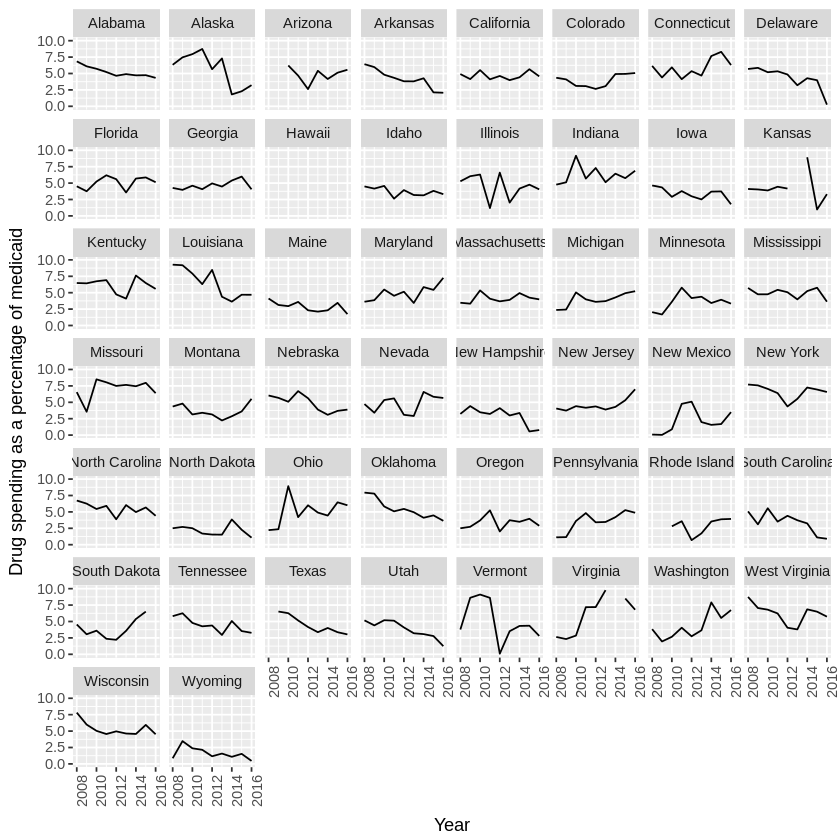

In [26]:
ggplot(df, aes(period_covered, drug_part_medicaid)) +
    geom_line() +
    facet_wrap(~ st_name) +
    ylab('Drug spending as a percentage of medicaid') +
    ylim(c(0,10)) +
    xlab('Year') +
    theme(axis.text.x = element_text(angle = 90, hjust = 1))

# Lobbyists to legislators

In [2]:
df = read.csv('lobbyists-unique.csv')
totals = read.csv('total-lobbyists.csv')

library(dplyr)
library(ggplot2)

In [3]:
head(df)

year,registrations,state,legislators,abbreviation,legislators_to_registrations
2008,31,Alabama,140,AL,4.5161290
2008,22,Alaska,60,AK,2.7272727
2008,48,Arizona,90,AZ,1.8750000
2008,36,Arkansas,135,AR,3.7500000
2008,144,California,120,CA,0.8333333
2008,32,Colorado,100,CO,3.1250000


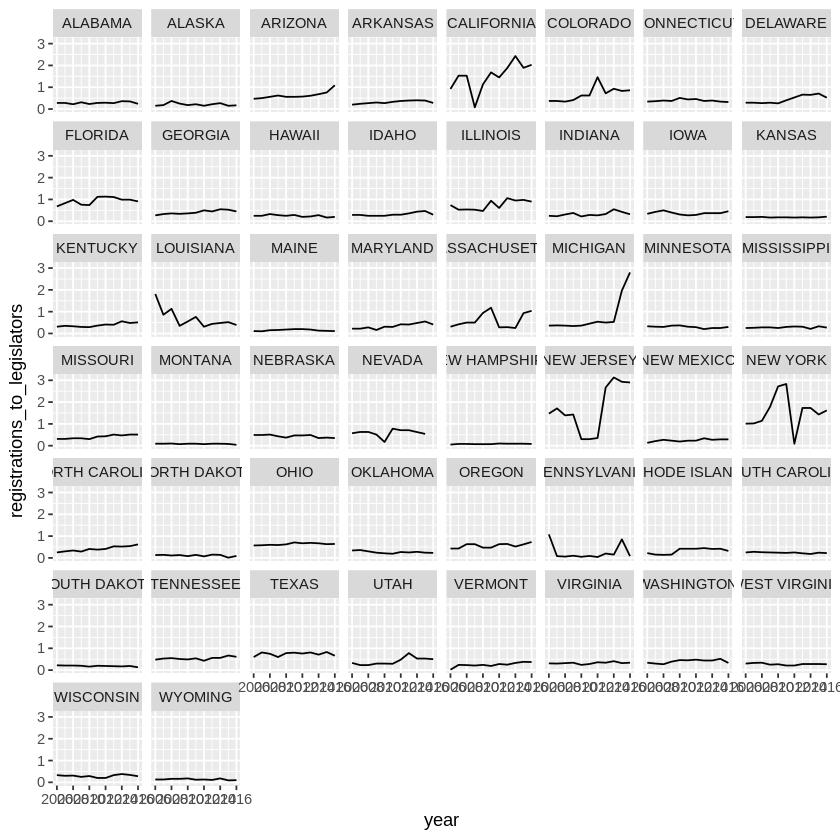

In [29]:
ggplot(df, aes(year, registrations_to_legislators)) + geom_line() + facet_wrap(~ state_name)

In [5]:
ratios = df %>%
    filter(year == 2017) %>%
    group_by(abbreviation) %>%
    summarise(ratio = lobbyists_to_legislators) %>%
    arrange(-ratio)

In [6]:
ratios$abbreviation
ratios$ratio

[1] CA MI NJ NY NV OR IL FL OH TX DE TN MO PA AZ LA KY NC WA GA RI UT CT VA MD
[26] CO HI ID IA NM WI AR VT AL MN NE OK WV MA IN MS SC KS ME SD AK NH ND MT WY
50 Levels: AK AL AR AZ CA CO CT DE FL GA HI IA ID IL IN KS KY LA MA MD ... WY

[1] 0.98333333 0.90540541 0.89166667 0.84037559 0.68253968 0.64444444
 [7] 0.63841808 0.57500000 0.46969697 0.44198895 0.41935484 0.40909091
[13] 0.37563452 0.37154150 0.36666667 0.32638889 0.32608696 0.31176471
[19] 0.29931973 0.29661017 0.29203540 0.28846154 0.27807487 0.26428571
[25] 0.26063830 0.25000000 0.25000000 0.24761905 0.24666667 0.24107143
[31] 0.22727273 0.21481481 0.21111111 0.20000000 0.18905473 0.18367347
[37] 0.18120805 0.17910448 0.17500000 0.17333333 0.16091954 0.14705882
[43] 0.14545455 0.09139785 0.08571429 0.06666667 0.04716981 0.04255319
[49] 0.04000000 0.03333333

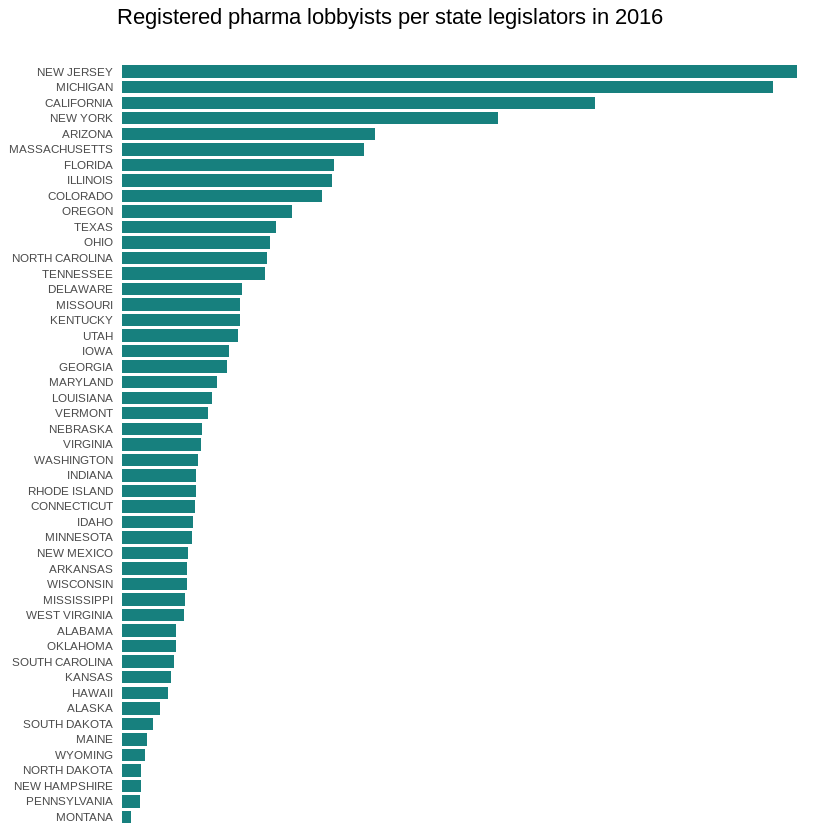

In [32]:
ggplot(ratios, aes(reorder(state_name,ratio), ratio)) +
    geom_col(width = 0.8, fill = '#17807E', position = position_dodge(width = 20)) +
    coord_flip() +
    ggtitle('Registered pharma lobbyists per state legislators in 2016') +
 #   geom_text(aes(label = ratio, hjust = -.1), size = 2.5) +
    geom_abline(intercept = 100, slope = 0, size = .2) +
    geom_abline(intercept = 200, slope = 0, size = .2) +
    geom_abline(intercept = 300, slope = 0, size = .2) +

    theme(panel.grid.major = element_blank(),
         panel.grid.minor = element_blank(),
         panel.background = element_blank(),
         legend.position = 'none',
         axis.title.y = element_blank(),
         axis.ticks.y = element_blank(),
         axis.text.y = element_text(size = 7, margin = margin(r = -18)),
         axis.ticks.x = element_blank(),
         axis.text.x = element_blank(),
         axis.title.x = element_blank(),
         plot.title = element_text(hjust = .15, margin = margin(b = 20)))

In [33]:
ratios = ratios %>% left_join(., totals, by = 'jurisdiction')

In [34]:
ratios$diff = ratios$count - ratios$ratio

In [35]:
ratios = ratios %>% select(c(1,3,5))

In [36]:
head(ratios)

state_name,ratio,diff
ALABAMA,0.2357143,1929.7643
ALASKA,0.1666667,619.8333
ARIZONA,1.0888889,14616.9111
ARKANSAS,0.2814815,3434.7185
CALIFORNIA,2.0333333,20543.9667
COLORADO,0.8600000,3835.1400


In [37]:
temp = gather(ratios, type, ratio, 2:3)

ERROR: Error in gather(ratios, type, ratio, 2:3): could not find function "gather"


In [ ]:
head(temp)

In [ ]:
ggplot(temp, aes(reorder(state_name,ratio), ratio, fill = type)) +
    geom_col(width = 0.8, fill = '#17807E', position = position_dodge(width = 20)) +
    coord_flip() +
    ggtitle('Registered pharma lobbyists per 100 state legislators in 2016') +
    geom_text(aes(label = ratio, hjust = -.1), size = 2.5) +
    geom_abline(intercept = 100, slope = 0, size = .2) +
    theme(panel.grid.major = element_blank(),
         panel.grid.minor = element_blank(),
         panel.background = element_blank(),
         legend.position = 'none',
         axis.title.y = element_blank(),
         axis.ticks.y = element_blank(),
         axis.text.y = element_text(size = 7, margin = margin(r = -18)),
         axis.ticks.x = element_blank(),
         axis.text.x = element_blank(),
         axis.title.x = element_blank(),
         plot.title = element_text(hjust = .15, margin = margin(b = 20)))

In [41]:
ratios = df %>%
    filter(year == 2016) %>%
    group_by(jurisdiction) %>%
    select(c(state_name, annual_registrations, seats))

Adding missing grouping variables: `jurisdiction`


In [39]:
ratios$ratio = ratios$annual_registrations/ratios$seats
ratios = ratios %>% arrange(-ratio)

Warning message:
“Unknown or uninitialised column: 'annual_registrations'.”Warning message:
“Unknown or uninitialised column: 'seats'.”

ERROR: Error in `$<-.data.frame`(`*tmp*`, ratio, value = numeric(0)): replacement has 0 rows, data has 49


In [40]:
ratios$jurisdiction
ratios$ratios

Warning message:
“Unknown or uninitialised column: 'jurisdiction'.”

NULL

Warning message:
“Unknown or uninitialised column: 'ratios'.”

NULL